# Social Computing/Social Gaming - Summer 2020
# Exercise Sheet 1 - Introduction to Python
We will be using Python for all exercises. In this exercise you will create a basic Python program. 

## Task 1.1: Python Pyramid
**a)** Create a function which takes a number of levels (N) and prints a pyramid that looks like this for N = 4:

In [2]:
   # 
  ###
 #####
#######

**Hints:**
- Do not forget the spaces left and right of the pyramid, except on the ground floor. In the example above 3 spaces to the left and right at the peak.  
- In order to execute a code cell, press Shift + Enter.

In [23]:
def printPyramid(N):
     # TODO your code here
    
    for i in range(N):
        count = N - 1
        count = count - i
        txt = ""
        txt2 = ""
        for j in range(count):
            txt = txt + " "
        for j in range(i*2+1):
            txt2 = txt2 + "#"
        print(txt+txt2)
printPyramid(4)

   #
  ###
 #####
#######


**b)** Extend the program by implementing user input. The user is asked to enter a number for the levels of the pyramid. Afterwards the pyramid is printed.

In [28]:
# TODO

def printPyramid_sol(N):
     # TODO your code here
    N = int(N)
    for i in range(N):
        count = N - 1
        count = count - i
        txt = ""
        txt2 = ""
        for j in range(count):
            txt = txt + " "
        for j in range(i*2+1):
            txt2 = txt2 + "#"
        print(txt+txt2)
num_levels = input('insert number of levels you want: ')
printPyramid_sol(num_levels)

insert number of levels you want: 10
         #
        ###
       #####
      #######
     #########
    ###########
   #############
  ###############
 #################
###################


## Task 1.2: The Simposons are introducing Social Computing
In social computing research, we need powerful tools to create, manipulate and display graphs. Luckily, there is a plethora of tools and libaries for that. 
NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

Especially for the second exercise sheet, we are going to use [**NetworkX**](https://networkx.github.io). It provides rich graph data structures and many out-of-the-box functions to process graphs and calculate different metrics. The tasks below should make you familiar with the library.<br>
Please consult the [reference](https://networkx.github.io/documentation/stable/reference/index.html) and the [tutorial](https://networkx.github.io/documentation/stable/tutorial.html).

To give you a short background on graph visualization, it is the research area in mathematics/computer science concerned with drawing graphs. It has applications in many fields, one of them is social computing. The quality of graph visualization is measured based on certain criteria, for example crossing minimization and bend minimization. There are many graph drawing algorithms that vary in their quality according to the graph's application and size. One technique is to draw graphs by using physical analogies.<br>
The basic idea of this technique is to associate edges between graph nodes with physical forces acting upon the nodes and computing an energy minimum. By setting off the dynamics that is induced by the forces, the graph will finally settle into a natural optimal display. A famous algorithm that implements this technique is the **Fruchtermann-Rheingold** algorithm. Its basic idea is to replace the graph edges with mechanical springs, and let the springs move the system to a minimal energy state.


Furthermore, you will be working with a large datasets, you need to save the variables in a suitable data format. In our case, the pandas library is a good choice. 
A pandas DataFrame is a 2D tabular structure, not unlike a SQL table.
Pandas DataFrame consists of rows, columns and data.
For more information on the library, see the [pandas manual](https://pandas.pydata.org/pandas-docs/version/0.19.2) and its [tutorial](https://pandas.pydata.org/pandas-docs/version/0.19.2/10min.html) to pandas dataframes.

In this exercise you will analyze a dataset about "The Simpsons".

First import the datasets consisting ``nodes.csv``, ``edges.csv`` and ``ep-char.csv``.

- **nodes.csv**: each vertex represents a character
- **edges.csv**: edges between the source character and target character. Represents an undirected graph showing the characters which appeared together in an episode
- **ep-char.csv**: shows which character has appeared in which episode


**Hints**: 
- For most TODOs it is sufficient to look at the pandas manual and use pandas library functions  
- You can get a better overview of the dataframe by printing it


Import the necessary libraries for this exercise.


In [42]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

Read the csv files into pandas dataframes.

In [90]:
# read the csv into pandas DataFrames
df_edges = pd.read_csv("simpsons/edges.csv")
df_nodes = pd.read_csv("simpsons/nodes.csv")
df_epchar = pd.read_csv("simpsons/ep-char.csv")

# 203 is the number of the last episode in season 9.
HIGHEST_EPISODE = 203

In [58]:
df_edges

,Source,Target,Type,Weight
0,2,1,Undirected,441
1,1,2,Undirected,441
2,3,1,Undirected,438
3,1,3,Undirected,438
4,3,2,Undirected,393
...,...,...,...,...
13325,2,651,Undirected,1
13326,651,3,Undirected,1
13327,3,651,Undirected,1
13328,651,95,Undirected,1


**a)** Your first task is to drop unwanted rows in the episodes dataframe. We are only interested in Seasons 1-9. 
Unwanted rows are rows which have an ``episode_id`` higher than ``HIGHEST_EPISODE``. 

In [59]:
# TODO: drop rows of the df_epchar DataFrame.
indexNames= df_epchar.episode_id[df_epchar.episode_id > HIGHEST_EPISODE].index.tolist()

# Delete these row indices from the dataframe
df_epchar.drop(indexNames, inplace=True)

**b)** Now you can merge the DataFrames together to link the required information. This is not unlike the join operation in SQL.

Since we are only interested in characters from the first 9 seasons, create a DataFrame ``df_merged`` which only contains characters from the first 203 episodes.

In [60]:
# TODO:
df_merged = df_epchar.merge(df_nodes,left_on="character_id",right_on = "Id")

# df_merged now consists of the characters which appear only in the first 9 seasons
df_merged.drop(['episode_id', 'character_id'], axis=1, inplace=True)

# TODO: now we have unnecessary information, drop the duplicates
df_merged = df_merged.drop_duplicates()

**c)** Now use the DataFrame of limited characters and merge them with the edges

In [61]:
# TODO:
# Hint: Use a left join, left_on='Id', right_on='Source'
df_merged2 = df_merged.merge(df_edges,left_on='Id', right_on='Source',how='left')

# Drop Type, as it is not that interesting
df_merged2 = df_merged2.drop(['Type'], axis=1)
df_merged2

,Id,charname,Source,Target,Weight
0,1,'Homer Simpson',1,2,441
1,1,'Homer Simpson',1,3,438
2,1,'Homer Simpson',1,4,402
3,1,'Homer Simpson',1,5,112
4,1,'Homer Simpson',1,6,2
...,...,...,...,...,...
9802,245,'Brad',245,1,1
9803,245,'Brad',245,2,1
9804,245,'Brad',245,3,1
9805,245,'Brad',245,92,1


**d)** Now we are only interested in characters who have appeared at least 20 times together. Select those.

In [62]:
# TODO: drop rows of the df_episodes DataFrame.

indexNames= df_merged2.Weight[df_merged2.Weight < 20].index.tolist()

# Delete these row indices from the dataframe
df_merged2.drop(indexNames, inplace=True)
df_merged2

,Id,charname,Source,Target,Weight
0,1,'Homer Simpson',1,2,441
1,1,'Homer Simpson',1,3,438
2,1,'Homer Simpson',1,4,402
3,1,'Homer Simpson',1,5,112
6,1,'Homer Simpson',1,8,29
...,...,...,...,...,...
8329,138,'Ralph Wiggum',138,4,31
8480,58,'Superintendent Gary Chalmers',58,1,20
8482,58,'Superintendent Gary Chalmers',58,3,22
8483,58,'Superintendent Gary Chalmers',58,4,22


In [63]:
a = df_merged2
b = pd.Series([122, 'Prova', 133, 444,2222],index=['Id','charname','Source','Target','Weight'])
a.append(b,ignore_index=True )

,Id,charname,Source,Target,Weight
0,1,'Homer Simpson',1,2,441
1,1,'Homer Simpson',1,3,438
2,1,'Homer Simpson',1,4,402
3,1,'Homer Simpson',1,5,112
4,1,'Homer Simpson',1,8,29
...,...,...,...,...,...
364,58,'Superintendent Gary Chalmers',58,1,20
365,58,'Superintendent Gary Chalmers',58,3,22
366,58,'Superintendent Gary Chalmers',58,4,22
367,58,'Superintendent Gary Chalmers',58,42,20


In [64]:
df_merged2

,Id,charname,Source,Target,Weight
0,1,'Homer Simpson',1,2,441
1,1,'Homer Simpson',1,3,438
2,1,'Homer Simpson',1,4,402
3,1,'Homer Simpson',1,5,112
6,1,'Homer Simpson',1,8,29
...,...,...,...,...,...
8329,138,'Ralph Wiggum',138,4,31
8480,58,'Superintendent Gary Chalmers',58,1,20
8482,58,'Superintendent Gary Chalmers',58,3,22
8483,58,'Superintendent Gary Chalmers',58,4,22


**e)** Now you have to include your alter ego into the network. Create a pandas Series with your name, your Id (which is 1337) and weights. Connect yourself to Homer Simpson. 

In [65]:
# TODO:
# Create a series for your character who is connected to homer 234 times 
# and add it to the dataframe
a = pd.Series([1337, 'Andrea Carrara', 1337, 1,234],index=['Id','charname','Source','Target','Weight'])
b = pd.Series([1, 'Homer Simpson', 1, 1337,234],index=['Id','charname','Source','Target','Weight'])
# TODO: append the list of series to the pandas data frame
df_merged2 = df_merged2.append(a,ignore_index=True)
df_merged2 = df_merged2.append(b,ignore_index=True)
# Create the graph from the dataframe
graph = nx.from_pandas_edgelist(df_merged2, source="Id", target="Target", edge_attr=True)

In [86]:
a = df_merged2.loc[df_merged2['Target'] == 1]
a.loc[df_merged2['Source'] == 1337]

df_nodes

,Id,charname
0,1,'Homer Simpson'
1,2,'Marge Simpson'
2,3,'Bart Simpson'
3,4,'Lisa Simpson'
4,5,'Maggie Simpson'
...,...,...
646,647,'Seth Rogen'
647,648,'Paul Rudd'
648,649,'Harlan Ellison'
649,650,'Stan Lee'


In [93]:
df_nodes = df_nodes.append(pd.Series([1337,'Andrea Carrara'],index = ['Id','charname']),ignore_index=True)


**f)** Draw the resulting graph with the given options. Choose 2 [layout](https://networkx.github.io/documentation/stable/reference/drawing.html) options that seem the most suitable for the data. Briefly discuss why you chose these over the others.

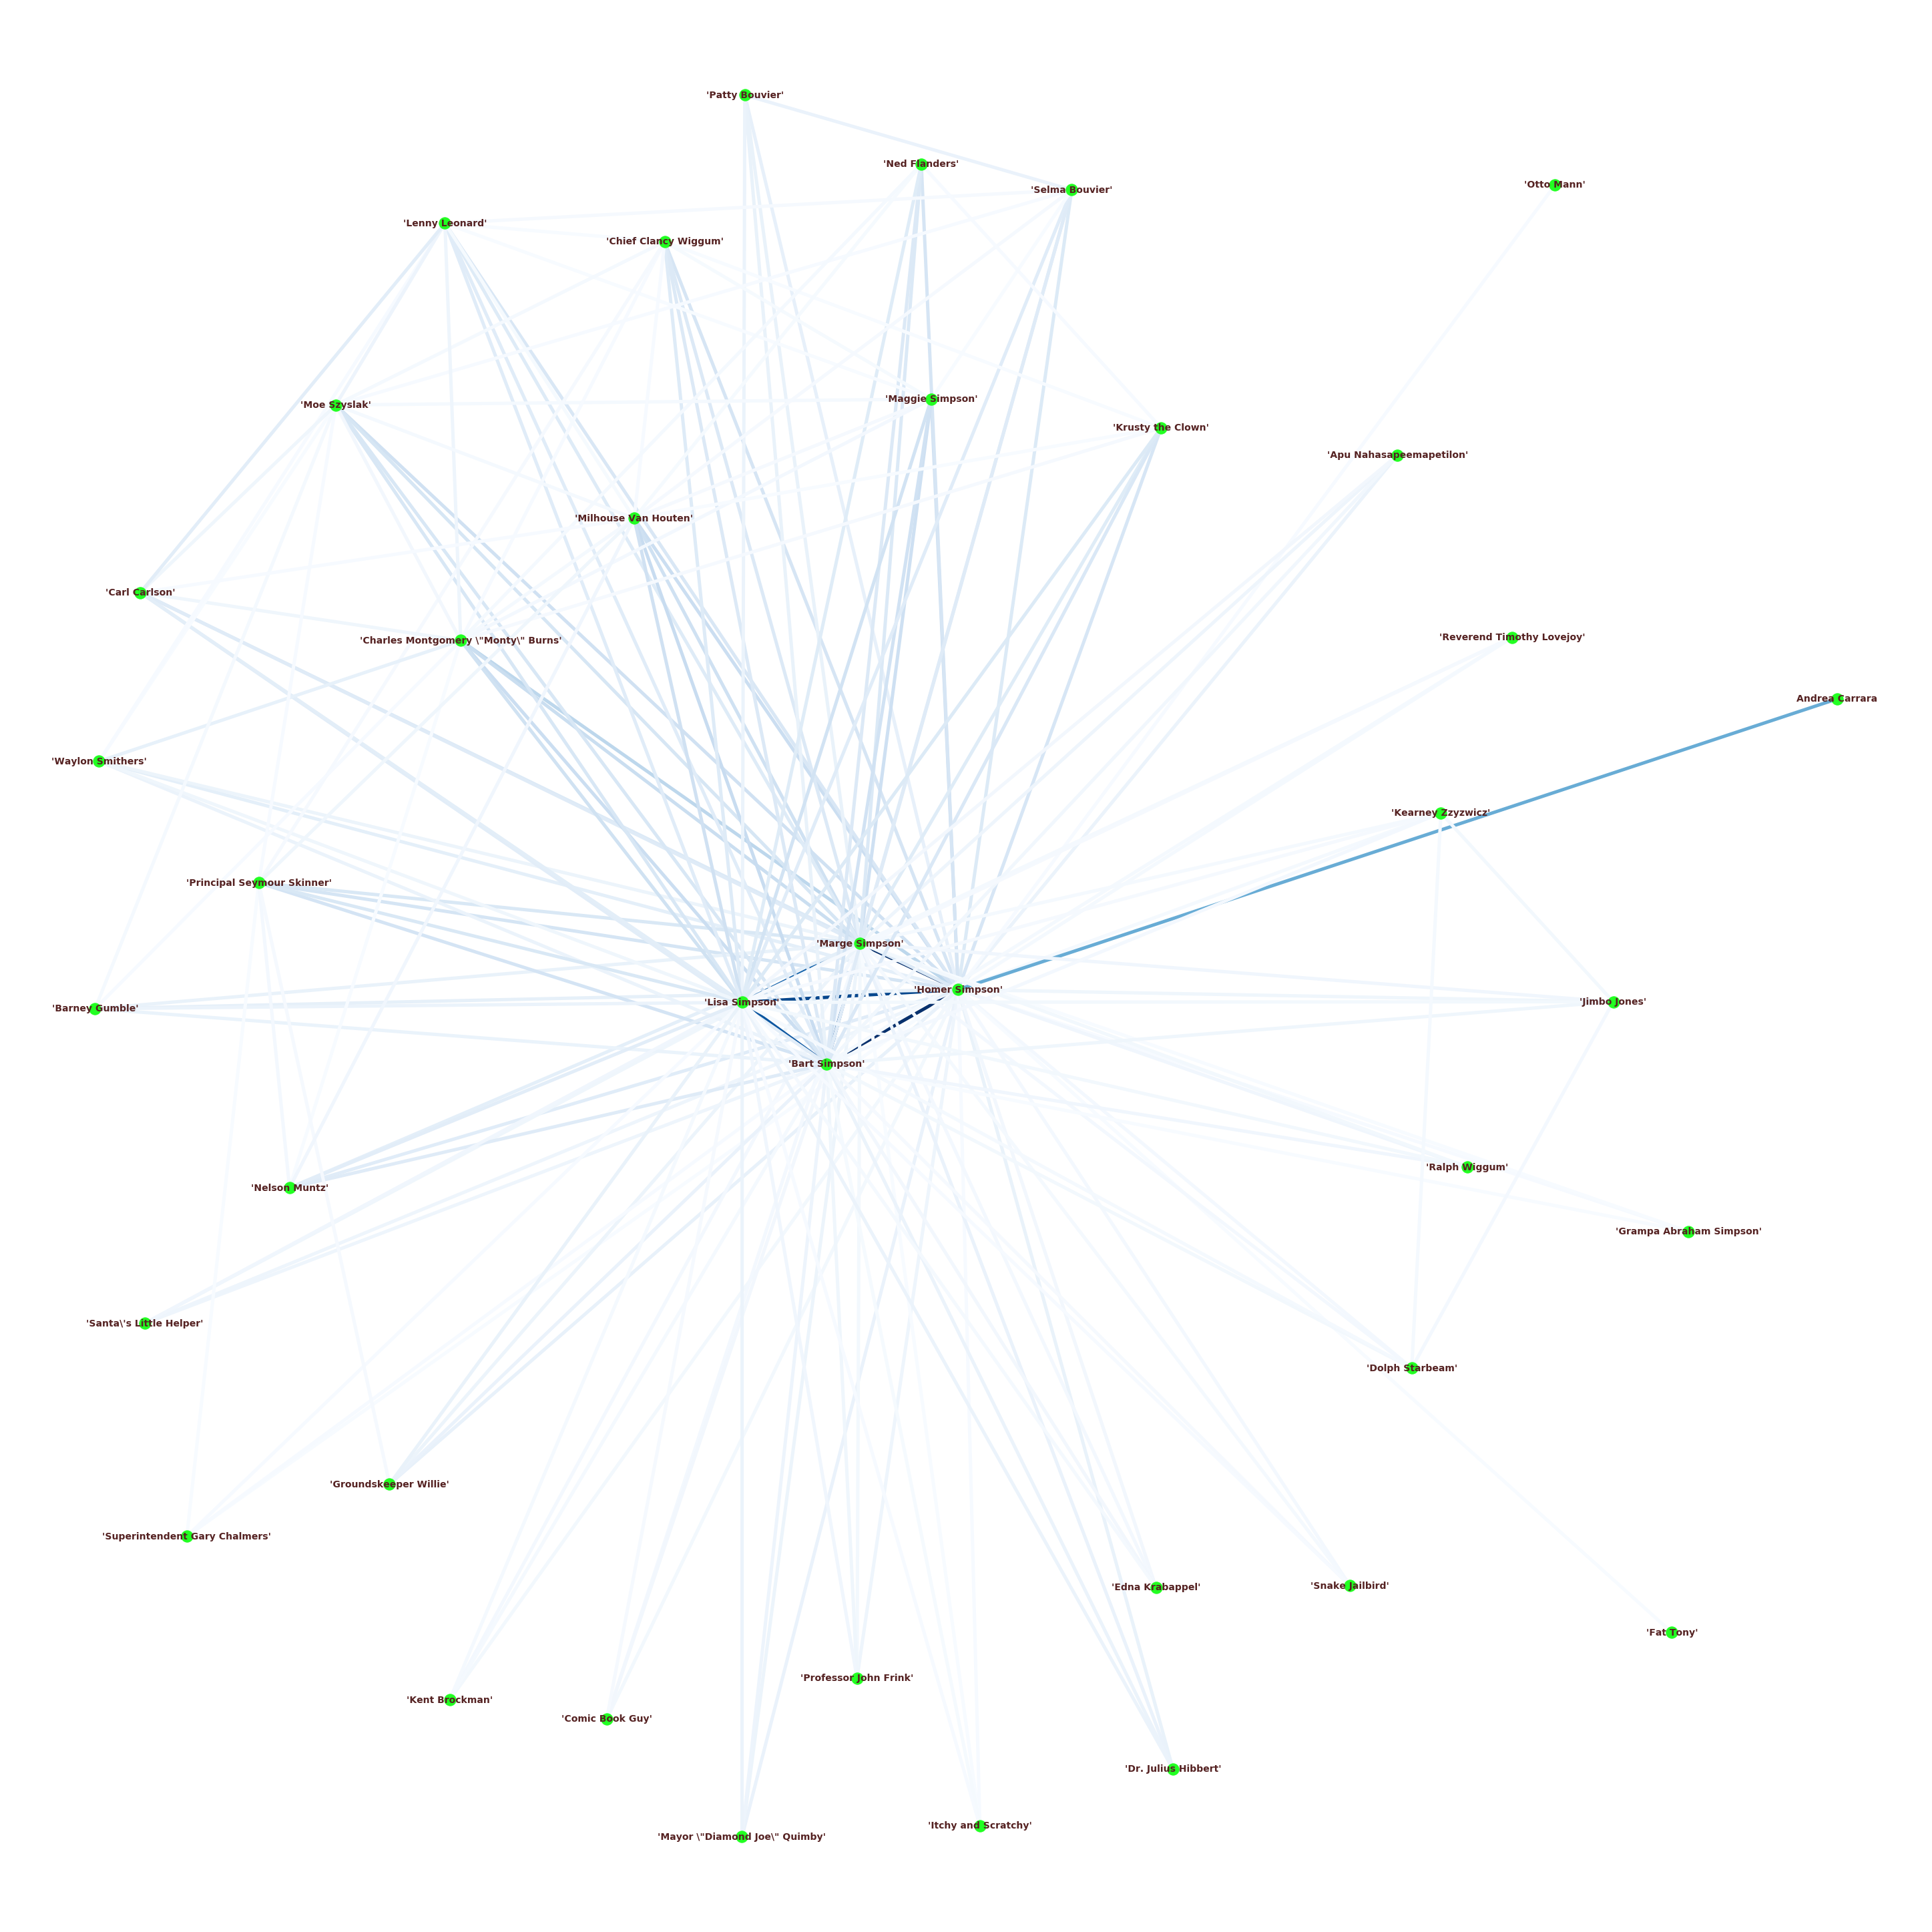

In [119]:
# Relabel the graph
df_nodes_labels_dict = df_nodes.set_index('Id').to_dict()['charname']
graph = nx.relabel_nodes(graph, df_nodes_labels_dict)

# Det the edge color according to the weight
edges,weights = zip(*nx.get_edge_attributes(graph,'Weight').items())

# Dtyle the graph
options = {
    "font_size" : 14,
    "font_color" : '#552222',
    "node_color" : '#22FF22',
    "width" : 5.0,
    "edgelist" : edges,
    "edge_color" : weights,
    "edge_cmap" : plt.cm.Blues
}

plt.figure(1,figsize=(40,40)) 

# TODO: plot the graph

#nx.draw(graph, with_labels=True, font_weight='bold')
pos = nx.kamada_kawai_layout(graph)
#pos = nx.spring_layout(graph)
#pos = nx.random_layout(graph)


nx.draw(graph, **options,with_labels=True, font_weight='bold',pos = pos)

**TODO: Write your observations here:**


